대회 설명: https://www.kaggle.com/competitions/playground-series-s4e1/overview

데이터셋 설명: https://www.kaggle.com/datasets/shubhammeshram579/bank-customer-churn-prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime
import random
import os
import sys

In [2]:
# 시드 고정
def seed_everything(seed: int = 2024):
    random.seed(seed)
    np.random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
seed_everything(2024)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
train = pd.read_csv('/content/drive/MyDrive/CUAI/EDA 스터디/5월_Bank Churn/train.csv')
test = pd.read_csv('/content/drive/MyDrive/CUAI/EDA 스터디/5월_Bank Churn/test.csv')
sample_submission = pd.read_csv('/content/drive/MyDrive/CUAI/EDA 스터디/5월_Bank Churn/sample_submission.csv')

train (null값 X)
- id: 인덱스
- Customer ID: 식별자
- Surname: last name(성)
- Credit Score: 신용 점수
- Geography: 거주지(France / Spain / Germany)
- Gender: 성별 (Male / Female)
- Age: 나이
- Tenure: 가입 후 누적 년수
- Balance: 계좌 잔액
- NumOfProducts: 사용하는 은행 상품 개수 (e.g., savings account, credit card)
- HasCrCard: 신용카드 보유 여부 (1 = yes, 0 = no)
- IsActiveMember: 활동중인 회원인지 여부 (1 = yes, 0 = no)
- EstimatedSalary: 추정 salary
- Exited: churned 여부 (1 = yes, 0 = no)

test (null값 X)
- Exited 제외 13 컬럼

sample_submission
- id, Exited

In [ ]:
train.head(3)

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.0,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.0,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.0,2,1.0,0.0,184866.69,0


In [ ]:
train.shape

(165034, 14)

In [ ]:
test.shape

(110023, 13)

### EDA

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [ ]:
# Balance에 0이 많음
# Age: 18~92, Tenure: 0~10, NumOfProducts: 1~4
# 신용카드 보유 비율 75%, 활동 중인 회원 비율 50%, 이탈 비율 21%
train.describe()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.0000,1.650340e+05,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,82516.5000,1.569201e+07,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,47641.3565,7.139782e+04,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,0.0000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,41258.2500,1.563314e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,82516.5000,1.569017e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,123774.7500,1.575682e+07,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,165033.0000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


<Axes: >

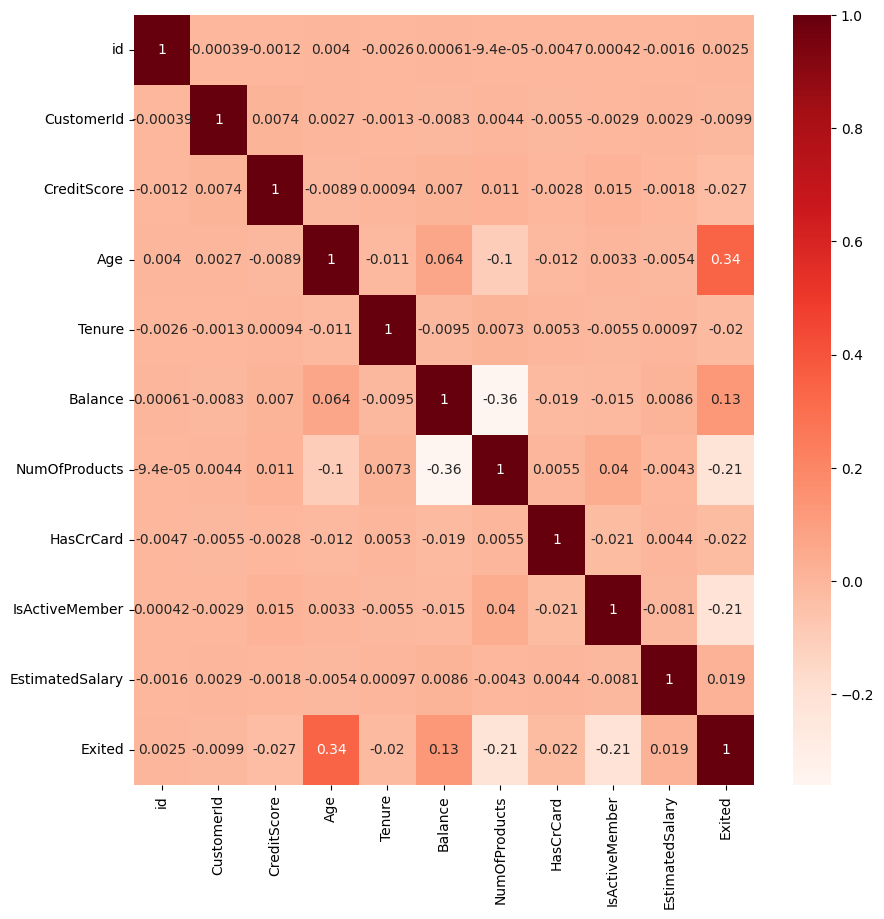

In [ ]:
# Exited와 corr 높은 변수 - Age(0.34), NumOfProducts(-0.21), IsActiveMember(-0.21), Balance(0.13)
# Balance - NumOfProducts(-0.36) -> 왜??
plt.figure(figsize=(10, 10))
n_train = train.select_dtypes(include=['float64', 'int64'])
sns.heatmap(n_train.corr(), annot=True, cmap='Reds')

타겟 변수(Exited) 분석

In [ ]:
# 타겟 변수의 불균형한 분포(79:21) -> oversampling??
train['Exited'].mean()

0.21159882206090866

독립 변수 분석

1. id, CustomerId -> drop
2. Surname - 약 2600개의 unique 항목 존재 -> 분석하기 어려울 것 같음 -> drop

In [ ]:
train_name = train['Surname'].unique()
test_name = test['Surname'].unique()
common_name = set(train_name) & set(test_name)
print(len(train_name), len(test_name), len(common_name))

2797 2708 2616


3. 수치형 변수 - CreditScore, Age, Tenure, Balance, NumOfProducts, EstimatedSalary

- CreditScore, EstimatedSalary

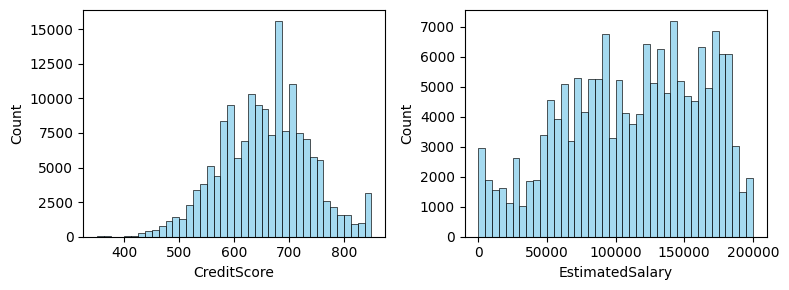

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(8, 3))
sns.histplot(train['CreditScore'], bins=40, color='skyblue', edgecolor='black', ax=axes[0])
sns.histplot(train['EstimatedSalary'], bins=40, color='skyblue', edgecolor='black', ax=axes[1])
plt.tight_layout()

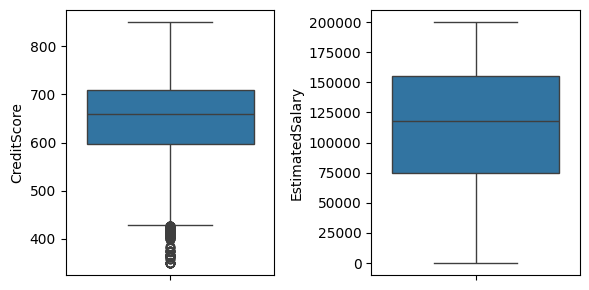

In [ ]:
# 이상치 X
fig, axes = plt.subplots(1, 2, figsize=(6, 3))
sns.boxplot(data=train, y='CreditScore', ax=axes[0])
sns.boxplot(data=train, y='EstimatedSalary', ax=axes[1])
plt.tight_layout()

- Balance

<Axes: xlabel='Balance', ylabel='Count'>

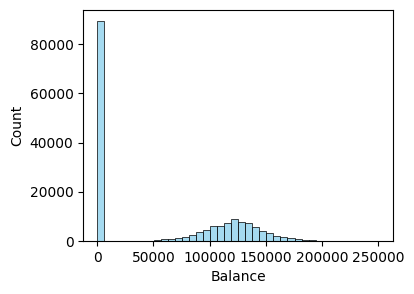

In [ ]:
plt.figure(figsize=(4, 3))
sns.histplot(train['Balance'], bins=40, color='skyblue', edgecolor='black')

In [ ]:
# Balance의 절반 이상이 0
print(train.shape[0])
print(train[train['Balance']==0].shape[0])

165034
89648


<Axes: xlabel='Balance', ylabel='Count'>

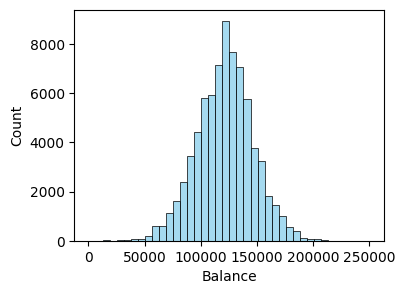

In [ ]:
# Balance가 0이 아닌 것 -> 수상하게 정규분포
plt.figure(figsize=(4, 3))
sns.histplot(train.loc[train['Balance']!=0, 'Balance'], bins=40, color='skyblue', edgecolor='black')

In [5]:
# Balance가 0인지 아닌지 여부 -> Exited에 큰 영향 X
print(train.loc[train['Balance']==0, 'Exited'].mean())
print(train.loc[train['Balance']!=0, 'Exited'].mean())

0.161654470819204
0.27099196137213805


- Tenure, NumOfProducts

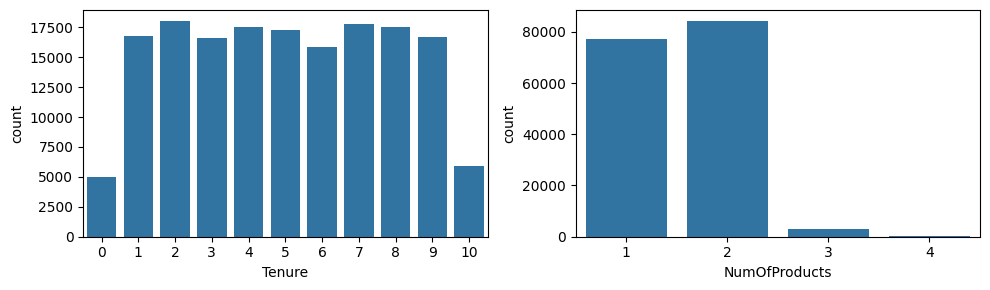

In [ ]:
# Tenure: 0, 10이 적고 나머지는 비슷
# NumOfProducts: 1, 2가 많음
fig, axes = plt.subplots(1, 2, figsize=(10, 3))
sns.countplot(data=train, x='Tenure', ax=axes[0])
sns.countplot(data=train, x='NumOfProducts', ax=axes[1])
plt.tight_layout()

In [ ]:
train['NumOfProducts'].value_counts()

NumOfProducts
2    84291
1    77374
3     2894
4      475
Name: count, dtype: int64

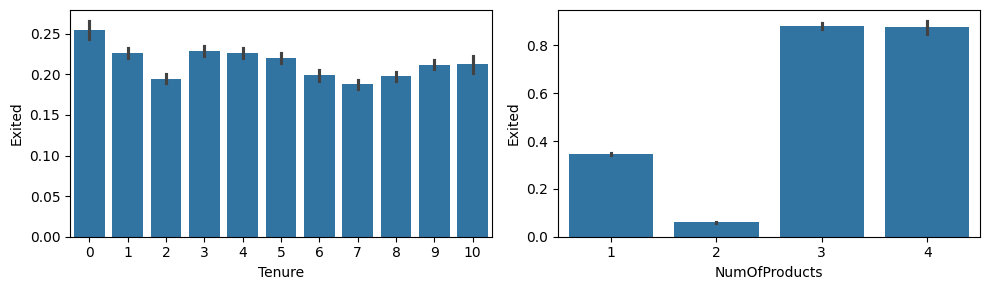

In [ ]:
# Tenure: 이탈률 비슷
# NumOfProducts: 3, 4가 높았으나 상대적으로 표본이 적어 높게 나온 걸로 판단됨 -> 2894명, 475명을 작다고 판단할 수 있나?
#                2(84291명)의 이탈률이 0.1도 안 됨
fig, axes = plt.subplots(1, 2, figsize=(10, 3))
sns.barplot(data=train, x='Tenure', y='Exited', ax=axes[0])
sns.barplot(data=train, x='NumOfProducts', y='Exited', ax=axes[1])
plt.tight_layout()

In [ ]:
# NumOfProd 2인지 아닌지 여부 -> Exited와의 상관계수 -0.38
train.loc[train['NumOfProducts']==2, 'NumOfProd_2'] = 1
train.loc[train['NumOfProducts']!=2, 'NumOfProd_2'] = 0

In [ ]:
n_train = train.select_dtypes(include=['float64', 'int64'])
n_train.corrwith(n_train['Exited']).sort_values(ascending=False)

Exited             1.000000
Age                0.340768
Balance            0.129743
EstimatedSalary    0.018827
id                 0.002512
CustomerId        -0.009947
Tenure            -0.019565
HasCrCard         -0.022141
CreditScore       -0.027383
IsActiveMember    -0.210237
NumOfProducts     -0.214554
NumOfProd_2       -0.378176
dtype: float64

+) NumOfProducts와 Balance의 corr가 -0.36

In [ ]:
# 음의 상관성 없어 보이는데
train.groupby('NumOfProducts')['Balance'].mean()

NumOfProducts
1    82621.876980
2    30097.537840
3    64438.112554
4    83263.135642
Name: Balance, dtype: float64

In [ ]:
train.value_counts('NumOfProducts')

NumOfProducts
2    84291
1    77374
3     2894
4      475
Name: count, dtype: int64

In [ ]:
# NumOfProducts=2 중 Balance=0 -> 75% --> 이유를 알고 싶다...
# NumOfProducts=3 중 Balance=0 -> 47%
train[train['Balance']==0].value_counts('NumOfProducts')

NumOfProducts
2    63288
1    24856
3     1351
4      153
Name: count, dtype: int64

- Age -> 연령대로 범주화

In [ ]:
train['Age'].describe() # 18~92세

count    165034.000000
mean         38.125888
std           8.867205
min          18.000000
25%          32.000000
50%          37.000000
75%          42.000000
max          92.000000
Name: Age, dtype: float64

In [ ]:
# 20대 이하, 30대, 40대, 50대 이상으로 범주화
print(f'10대:', train[train['Age'] < 20].shape[0])
print(f'20대:', train[(train['Age'] >= 20) & (train['Age'] < 30)].shape[0])
print(f'30대:', train[(train['Age'] >= 30) & (train['Age'] < 40)].shape[0])
print(f'40대:', train[(train['Age'] >= 40) & (train['Age'] < 50)].shape[0])
print(f'50대:', train[(train['Age'] >= 50) & (train['Age'] < 60)].shape[0])
print(f'60대 이상:', train[train['Age'] >= 60].shape[0])

10대: 332
20대: 23202
30대: 81253
40대: 43319
50대: 12186
60대 이상: 4742


In [ ]:
def age_group(age):
    if age < 30:
        return '20s under'
    elif age < 40:
        return '30s'
    elif age < 50:
        return '40s'
    else:
        return '50s over'

train['AgeGroup'] = train['Age'].apply(age_group)

<Axes: xlabel='AgeGroup', ylabel='Exited'>

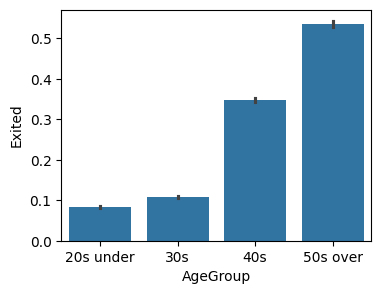

In [ ]:
# Age와 Exited가 양의 상관관계를 보임
# Age와 Exited의 상관계수 -> 0.34
# AgeGroup을 LabelEncoding한 후 Exited와의 상관계수 -> 0.35
plt.figure(figsize=(4, 3))
sns.barplot(data=train.sort_values(by='AgeGroup'), x='AgeGroup', y='Exited')

4. 범주형 변수 - Geography, Gender, HasCrCard, IsActiveMember
- 원핫 인코딩 필요

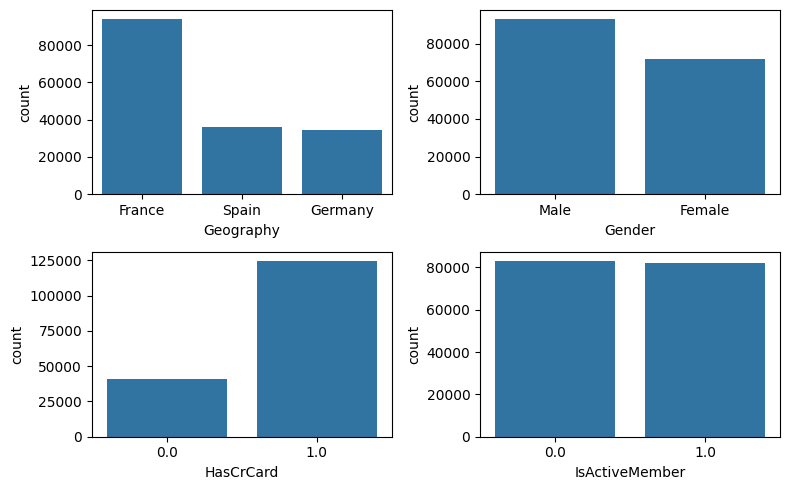

In [ ]:
# France가 많고, CrCard 있는 사람이 많음
fig, axes = plt.subplots(2, 2, figsize=(8, 5))
sns.countplot(data=train, x='Geography', ax=axes[0, 0])
sns.countplot(data=train, x='Gender', ax=axes[0, 1])
sns.countplot(data=train, x='HasCrCard', ax=axes[1, 0])
sns.countplot(data=train, x='IsActiveMember', ax=axes[1, 1])
plt.tight_layout()

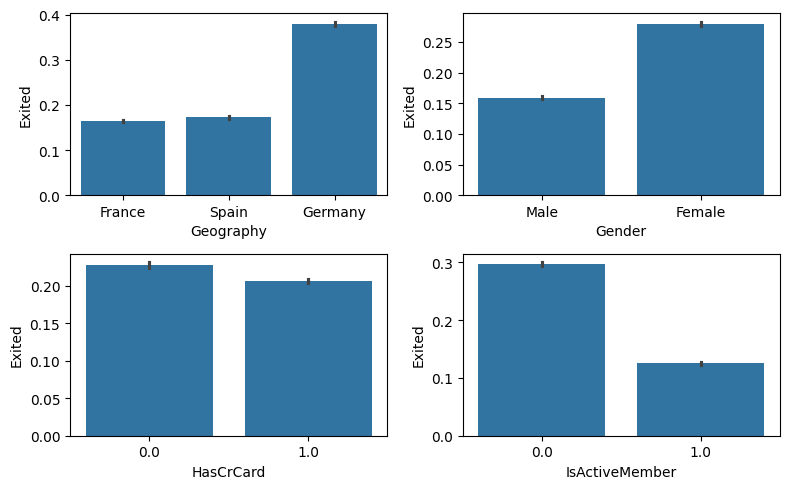

In [ ]:
# Germany, Female, NotActiveMember의 Exited가 높음
# HasCrCard는 Exited에 영향 X
# France 인구가 많은데도 Exited가 낮음
fig, axes = plt.subplots(2, 2, figsize=(8, 5))
sns.barplot(data=train, x='Geography', y='Exited', ax=axes[0, 0])
sns.barplot(data=train, x='Gender', y='Exited', ax=axes[0, 1])
sns.barplot(data=train, x='HasCrCard', y='Exited', ax=axes[1, 0])
sns.barplot(data=train, x='IsActiveMember', y='Exited', ax=axes[1, 1])
plt.tight_layout()

In [ ]:
# Germany 여부 -> Exited와의 상관계수 0.21
train.loc[train['Geography']=='Germany', 'Germany'] = 1
train.loc[train['Geography']!='Germany', 'Germany'] = 0

In [ ]:
n_train = train.select_dtypes(include=['float64', 'int64'])
n_train.corrwith(n_train['Exited']).sort_values(ascending=False)

Exited             1.000000
Age                0.340768
Germany            0.211054
Balance            0.129743
EstimatedSalary    0.018827
id                 0.002512
CustomerId        -0.009947
Tenure            -0.019565
HasCrCard         -0.022141
CreditScore       -0.027383
IsActiveMember    -0.210237
NumOfProducts     -0.214554
NumOfProd_2       -0.378176
dtype: float64

<Axes: >

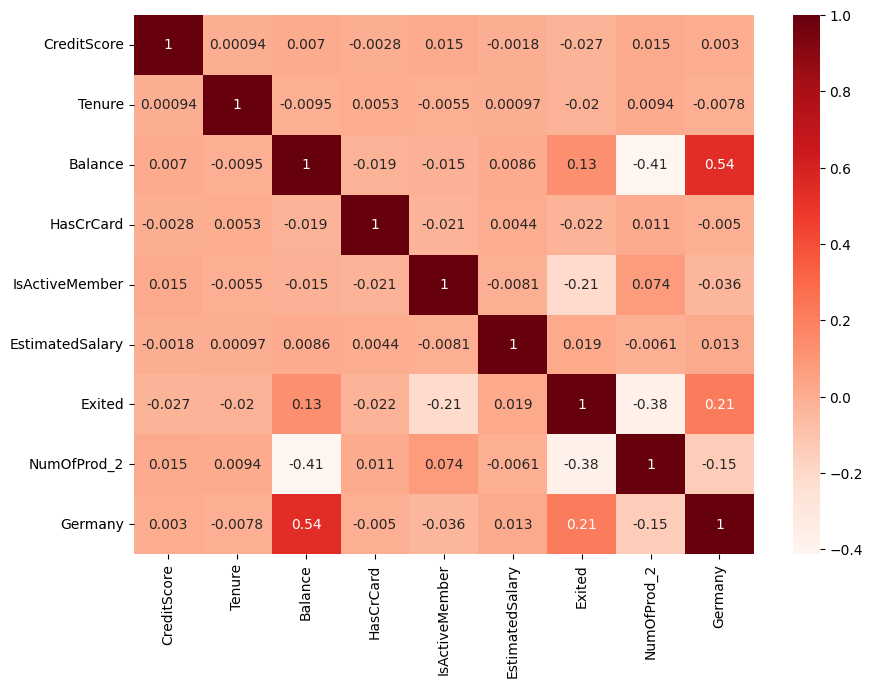

In [ ]:
plt.figure(figsize=(10, 7))
n_train = train.select_dtypes(include=['float64', 'int64'])
n_train.drop(columns = ['id', 'CustomerId', 'Age', 'NumOfProducts'], inplace=True)
sns.heatmap(n_train.corr(), annot=True, cmap='Reds')

<Axes: xlabel='Geography', ylabel='Balance'>

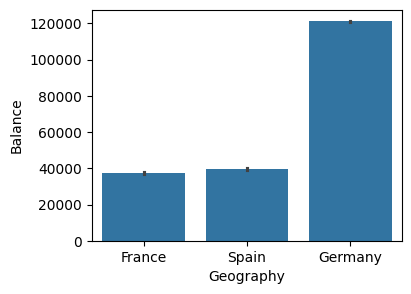

In [ ]:
# Balance와 Germany 상관계수 0.54
plt.figure(figsize=(4, 3))
sns.barplot(data=train, x='Geography', y='Balance')

In [ ]:
# Germany 중 Balance=0 -> 0.3% --> 차원 축소로 다중공선성 해결?
print(train[train['Germany']==1].shape[0])
print(train[(train['Geography']=='Germany') & (train['Balance']==0.0)].shape[0])

34606
113


In [ ]:
train.columns

Index(['id', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender',
       'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'NumOfProd_2',
       'AgeGroup', 'Germany'],
      dtype='object')

### EDA 결론

1. 타겟 변수(Exited) 분석
  - 불균형한 분포(79:21) -> oversampling??

2. 피처 선택
  - Geography -> Germany 여부
  - Age -> AgeGroup(20대 이하, 30대, 40대, 50대 이상)
  - NumOfProducts -> 2인지 아닌지 여부
  - Balance -> 절반 이상이 0
  - Gender, IsActiveMember -> 이탈률 차이는 있었으나 큰 차이가 아님
  - CreditScore, Tenure, HasCrCard, EstimatedSalary -> 별로 안 중요해 보여
  - id, CustomerId, Surname -> drop

3. 각 피처와 Exited의 관계
  - Germany 여부 -> France, Spain에 비해 Germany의 이탈률이 2배 이상 높음
  - AgeGroup -> 나이 많을수록 이탈률 증가, 30대 이하(약 0.1) | 40대 이상(약 0.45)
  - NumOfProducts -> 2(84291명)의 이탈률 0.1 미만 | 3,4의 이탈률 0.8
  - Balance -> not0의 이탈률이 0.1 정도 높음
  - Gender -> Female의 이탈률이 0.1 정도 높음
  - IsActiveMember -> 0의 이탈률이 0.15 정도 높음

4. 다중공선성 문제
  - Balance와 Germany 상관계수 0.54
    - Germany 중 Balance=0 -> 0.3%
  - Balance와 NumOfProd_2 상관계수 -0.41
    - NumOfProducts=2 중 Balance=0 -> 75%
  